# GPS track - VTT Lake District National Park

GPS from Ben Bardsley

In [3]:
from os import path
fname = path.expanduser('TrackBen.csv')

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv(fname,parse_dates=[3])  # defines column 3 as datetime

In [5]:
df.head()

,54.6108593233,-3.0550367385,153.47,2016-06-05 03:01:06
0,54.610884,-3.055061,137.61,2016-06-05 03:01:36
1,54.610413,-3.055502,138.09,2016-06-05 03:02:06
2,54.609286,-3.056674,137.13,2016-06-05 03:02:36
3,54.607355,-3.058437,136.16,2016-06-05 03:03:06
4,54.605330,-3.059969,135.20,2016-06-05 03:03:36


In [6]:
len(df)

2064

In [7]:
df.columns

Index([' 54.6108593233', '-3.0550367385', '153.47', '2016-06-05 03:01:06'], dtype='object')

In [8]:
df.dtypes

 54.6108593233                float64
-3.0550367385                 float64
153.47                        float64
2016-06-05 03:01:06    datetime64[ns]
dtype: object

In [9]:
# Name columns but I loose the first row of data
df.columns=['lat','lng','height','datetime']

In [10]:
df.dtypes

lat                float64
lng                float64
height             float64
datetime    datetime64[ns]
dtype: object

In [11]:
import geo

In [12]:
#look at code
#??geo

In [13]:
from geo import circle_dist

In [14]:
# calculate distance between data points
lat1, lng1 = df.iloc[0].lat, df.iloc[0].lng
lat2, lng2 = df.iloc[1].lat, df.iloc[1].lng
dist_km = circle_dist(lat1, lng1, lat2, lng2)
print('Distance between two datapoints = %f km' %(dist_km))

Distance between two datapoints = 0.059590 km


In [15]:
#use shift rather than iterator in for loop to calculate
df['dist'] = circle_dist(df['lat'], df['lng'], df['lat'].shift(), df['lng'].shift())

In [16]:
df.head()

,lat,lng,height,datetime,dist
0,54.610884,-3.055061,137.61,2016-06-05 03:01:36,NaN
1,54.610413,-3.055502,138.09,2016-06-05 03:02:06,0.059590
2,54.609286,-3.056674,137.13,2016-06-05 03:02:36,0.146320
3,54.607355,-3.058437,136.16,2016-06-05 03:03:06,0.242982
4,54.605330,-3.059969,135.20,2016-06-05 03:03:36,0.245910


In [17]:
print('Total distance covered = %.2f km' %(df['dist'].sum()))

Total distance covered = 198.41 km


In [18]:
#df.fillna(0) # fill NaN with zero 
#set diantance covered for row 0 as zero
df.iloc[[0],[4]] = 0

In [19]:
df['time_diff'] = df['datetime'] - df['datetime'].shift()

In [20]:
df.head()

,lat,lng,height,datetime,dist,time_diff
0,54.610884,-3.055061,137.61,2016-06-05 03:01:36,0.000000,NaT
1,54.610413,-3.055502,138.09,2016-06-05 03:02:06,0.059590,00:00:30
2,54.609286,-3.056674,137.13,2016-06-05 03:02:36,0.146320,00:00:30
3,54.607355,-3.058437,136.16,2016-06-05 03:03:06,0.242982,00:00:30
4,54.605330,-3.059969,135.20,2016-06-05 03:03:36,0.245910,00:00:30


In [21]:
total_time = df['time_diff'].sum()
total_time

Timedelta('0 days 17:11:38')

In [22]:
#speed in km/h
df['speed'] = df['dist'] / (df['time_diff'] / np.timedelta64(1, 'h'))
df.head()

,lat,lng,height,datetime,dist,time_diff,speed
0,54.610884,-3.055061,137.61,2016-06-05 03:01:36,0.000000,NaT,NaN
1,54.610413,-3.055502,138.09,2016-06-05 03:02:06,0.059590,00:00:30,7.150797
2,54.609286,-3.056674,137.13,2016-06-05 03:02:36,0.146320,00:00:30,17.558413
3,54.607355,-3.058437,136.16,2016-06-05 03:03:06,0.242982,00:00:30,29.157895
4,54.605330,-3.059969,135.20,2016-06-05 03:03:36,0.245910,00:00:30,29.509235


In [23]:
df['height_diff'] = df['height'] - df['height'].shift()

In [24]:
print('Height max = %f' %(df['height'].max()))
print('Height min = %f' %(df['height'].min()))

Height max = 819.180000
Height min = 51.570000


In [25]:
df.head(10)

,lat,lng,height,datetime,dist,time_diff,speed,height_diff
0,54.610884,-3.055061,137.61,2016-06-05 03:01:36,0.000000,NaT,NaN,NaN
1,54.610413,-3.055502,138.09,2016-06-05 03:02:06,0.059590,00:00:30,7.150797,0.48
2,54.609286,-3.056674,137.13,2016-06-05 03:02:36,0.146320,00:00:30,17.558413,-0.96
3,54.607355,-3.058437,136.16,2016-06-05 03:03:06,0.242982,00:00:30,29.157895,-0.97
4,54.605330,-3.059969,135.20,2016-06-05 03:03:36,0.245910,00:00:30,29.509235,-0.96
5,54.603470,-3.059938,137.13,2016-06-05 03:04:06,0.206826,00:00:30,24.819121,1.93
6,54.601882,-3.060249,143.37,2016-06-05 03:04:36,0.177745,00:00:30,21.329450,6.24
7,54.600288,-3.060272,144.34,2016-06-05 03:05:06,0.177352,00:00:30,21.282221,0.97
8,54.598335,-3.060052,146.74,2016-06-05 03:05:36,0.217649,00:00:30,26.117856,2.40
9,54.598565,-3.058973,151.54,2016-06-05 03:06:06,0.074044,00:00:30,8.885292,4.80


In [26]:
df['speed'].describe()

count    2063.000000
mean       11.539348
std         8.519197
min         0.025482
25%         5.017831
50%         9.056581
75%        16.339907
max        55.675154
Name: speed, dtype: float64

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
plt.style.use('seaborn-whitegrid')

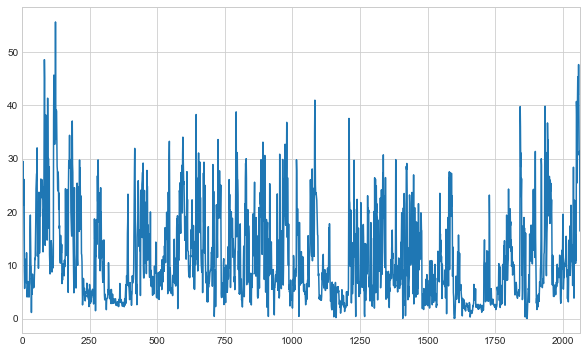

In [28]:
df['speed'].plot()

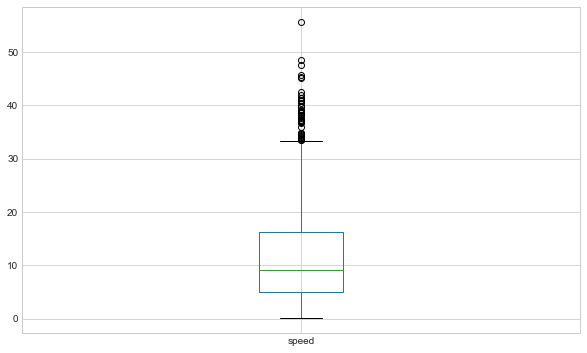

In [29]:
df['speed'].plot.box()

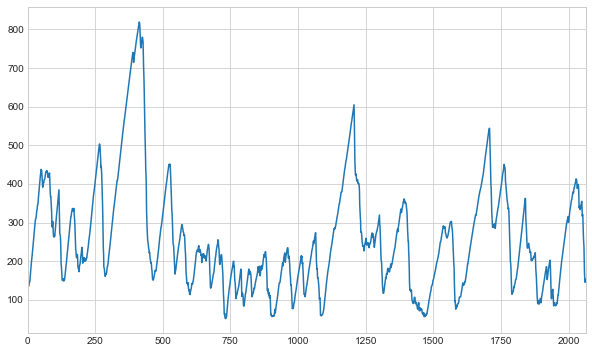

In [30]:
df['height'].plot()

Use Folium to map route

In [31]:
#!pip install folium
# https://folium.readthedocs.io/en/latest/quickstart.html

In [32]:
import folium

In [33]:
min_lat, max_lat   = df['lat'].min(),  df['lat'].max()
min_lng, max_lng   = df['lng'].min(),  df['lng'].max()
mean_lat, mean_lng = df['lat'].mean(), df['lng'].mean()

print(min_lat,  max_lat)
print(min_lng,  max_lng)
print(mean_lat, mean_lng)

54.3199012522 54.6417217422
-3.2782110292 -2.8019205295
54.45961640837786 -3.0570840219383753


In [34]:
m_map = folium.Map(location=[mean_lat , mean_lng],
               tiles='Stamen Terrain', 
               zoom_start=9,
               min_lat=min_lat, 
               max_lat=max_lat,
               min_lon=min_lng, 
               max_lon=max_lng,
               max_zoom=18, 
               min_zoom=5)


In [35]:
folium.Marker([mean_lat, mean_lng],
    popup='Ben VTT Lake District NP Cumbria',
    icon=folium.Icon(color='green', icon='ok-sign')).add_to(m_map)
m_map

In [36]:
def add_marker(row):
    new_marker = folium.CircleMarker([row['lat'], row['lng']], radius=1, 
                                 color='red', 
                                 fill_color='red').add_to(m_map)

In [37]:
# chack code works for single point
row = df.iloc[132]    
add_marker(row)

print(row['lat'], row['lng'] )
m_map


54.6110020671 -2.8329916578


In [38]:
df = df.set_index('datetime')

In [39]:
#resample into 10 minute intervals
mdf = df.resample('10T').mean()

In [40]:
mdf.head()

,lat,lng,height,dist,speed,height_diff
datetime,,,,,,
2016-06-05 03:00:00,54.602451,-3.057345,159.603529,0.121765,15.525100,4.415625
2016-06-05 03:10:00,54.603388,-3.045358,283.557500,0.068703,8.244310,6.561000
2016-06-05 03:20:00,54.601522,-3.024485,398.699000,0.110755,13.290552,2.595500
2016-06-05 03:30:00,54.594210,-2.985449,419.055500,0.167369,20.084236,1.322000
2016-06-05 03:40:00,54.599301,-2.945543,352.243000,0.220963,26.515575,-7.666500


In [44]:
mdf.apply(add_marker,axis=1)
m_map